In [1]:
import torch
import torchvision
from torch import nn
# from torch.autograd import Variable
from torch.utils.data import DataLoader  
import torchvision.datasets as datasets
from torchvision import transforms
from torchvision.utils import save_image

import time
from progressbar import *
import os
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#Enable cuda if cuda is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device, "is available ")

cuda is available 


In [3]:
#image for transformation 
num_epochs = 100
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

## Testing if transformation is working fine

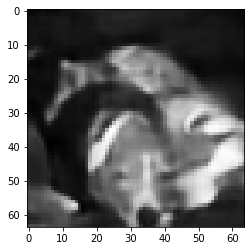

In [4]:
image = plt.imread("./dogs/2.png")[:,:,0]
plt.imshow(image, cmap='gray')

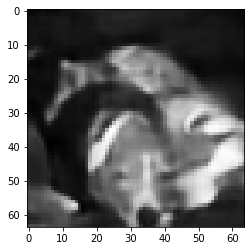

In [5]:
modified_image = img_transform(image)
plt.imshow(modified_image.numpy()[0], cmap='gray')

## Model Learning 

In [9]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1),  # b, 16, 10, 10
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # b, 16, 5, 5
            nn.Conv2d(16, 8, 3, stride=2, padding=1),  # b, 8, 3, 3
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)  # b, 8, 2, 2
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2),  # b, 16, 5, 5
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  # b, 8, 15, 15
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),  # b, 1, 28, 28
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                             weight_decay=1e-5)

print(model)

autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 8, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(8, 1, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (5): Tanh()
  )
)


In [10]:
#image for transformation 
num_epochs = 100
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

In [11]:
train_dataset = datasets.ImageFolder(root='./dog_data', transform=img_transform)
trainset = DataLoader(dataset = train_dataset,
                     batch_size=batch_size,
                     shuffle=True)

## Could be used for testing if the iteration is working
* trainiter = iter(trainset)
* imgs, labels = trainiter.next()  #labels not needed in autoencoder

In [12]:
import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=num_epochs).start()

for i in range(num_epochs):
    for train_data in trainset:
        imgs,_ = train_data;
        output = model.forward(imgs.to(device))
        loss = criterion(output, imgs.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('\rLoss value : {}'.format(float(loss)), end = ' ')
        timer.update(i)

timer.finish()

Loss value : 0.24424152076244354 

Loss value : 0.252081036567688 5 

Loss value : 0.24825765192508698 

Loss value : 0.20234635472297668 

Loss value : 0.18758553266525269 

Loss value : 0.15587516129016876 

Loss value : 0.14156539738178253 

Loss value : 0.12204977869987488 

Loss value : 0.10641132295131683 

Loss value : 0.10115038603544235 

Loss value : 0.10186571627855301 

Loss value : 0.09607048332691193 

Loss value : 0.08443678170442581 

Loss value : 0.0869564339518547  

Loss value : 0.08615769445896149 

Loss value : 0.09353091567754745 

Loss value : 0.09088675677776337 

Loss value : 0.0825541689991951  

Loss value : 0.08312872052192688 

Loss value : 0.07780364900827408 

Loss value : 0.083864726126194 4 

Loss value : 0.08669196069240578 

Loss value : 0.07502829283475876 

Loss value : 0.07780240476131439 

Loss value : 0.07769545167684555 

Loss value : 0.0721680074930191  

Loss value : 0.07078439742326736 

Loss value : 0.07076973468065262 

Loss value : 0.07246909290552139 

Loss value : 0.07188905030488968 

Loss value : 0.07081471383571625 

Loss value : 0.06686964631080627 

Loss value : 0.06962670385837555 

Loss value : 0.06671452522277832 

Loss value : 0.06404324620962143 

Loss value : 0.0670318752527237  

Loss value : 0.0634910836815834   

Loss value : 0.06423783302307129  

Loss value : 0.06149454414844513  

Loss value : 0.06515313684940338  

Loss value : 0.06008002161979675 

Loss value : 0.05903339385986328  

Loss value : 0.06094745546579361  

Loss value : 0.06092662736773491  

Loss value : 0.05663827434182167  

Loss value : 0.05772656947374344  

Loss value : 0.05547628551721573  

Loss value : 0.059290532022714615 

Loss value : 0.05864496901631355  

Loss value : 0.05581627041101456  

Loss value : 0.05658012628555298  

Loss value : 0.05396251380443573  

Loss value : 0.05433984100818634  

Loss value : 0.05399218201637268  

Loss value : 0.05796770006418228  

Loss value : 0.05510669946670532  

Loss value : 0.05476895719766617 

Loss value : 0.05275489017367363  

Loss value : 0.05301554128527641  

Loss value : 0.05264521390199661  

Loss value : 0.049575500190258026 

Loss value : 0.05372236669063568  

Loss value : 0.05093785375356674  

Loss value : 0.05629380792379379  

Loss value : 0.051361896097660065 

Loss value : 0.054294079542160034 

Loss value : 0.05240178108215332  

Loss value : 0.051400214433670044 

Loss value : 0.050983488559722935 

Loss value : 0.04957530274987221 

Loss value : 0.050805095583200455 

Loss value : 0.0539277046918869 4 

Loss value : 0.049976397305727005 

Loss value : 0.05094494670629501  

Loss value : 0.05222533270716667  

Loss value : 0.05078751593828201  

Loss value : 0.050073765218257904 

Loss value : 0.05397071689367294  

Loss value : 0.04924260824918747  

Loss value : 0.049476467072963715 

Loss value : 0.04962330311536789  

Loss value : 0.046192251145839696 

Loss value : 0.05150354653596878  

Loss value : 0.050255537033081055 

Loss value : 0.050954140722751624 

Loss value : 0.05243575945496559  

Loss value : 0.0518312081694603 6 

Loss value : 0.049901463091373444 

Loss value : 0.04729941859841347  

Loss value : 0.05132776498794556  

Loss value : 0.046492673456668854 

Loss value : 0.04618431627750397  

Loss value : 0.045767635107040405 

Loss value : 0.04760703071951866 

Loss value : 0.04825644567608833  

Loss value : 0.049308426678180695 

Loss value : 0.04914920777082443  

Loss value : 0.05153144896030426  

Loss value : 0.049926016479730606 

Loss value : 0.04660830646753311  

Loss value : 0.049822401255369186 

## Testing 

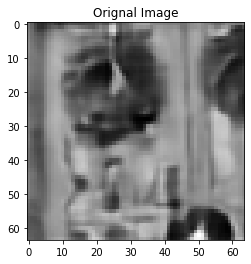

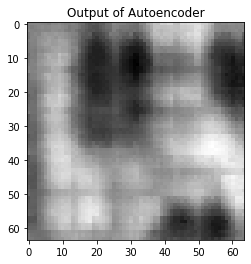

In [35]:
nos = 13
plt.imshow(imgs[nos][0], cmap='gray')
plt.title('Orignal Image')
plt.show()
output = model.forward(imgs.to(device))[nos][0]
plt.imshow(output.cpu().detach().numpy(), cmap='gray')
plt.title('Output of Autoencoder')
plt.show()

In [ ]:
## Temporary codes 
x_data = []
for i in range(10):
    data = plt.imread("./dogs/{}.png".format(i))[:,:,0]
    data = img_transform(data).reshape([1,1,64,64])
    x_data.append(data)
    
x_data = torch.cat(tuple(x_data), 0)
print(x_data.size())